
## Prototype: NSFW Image Detector (Male Genital Shaped Items)
### Machine Learning and Neural Networks (Template 2: Gather your own dataset)

Image Classification using CNN Keras | Full implementation
<br>
Source: https://www.youtube.com/watch?v=J1jhfAw5Uvo

Prototype main objective: able to classify positive or negative images to accuracy above 50%

- Binary classification task

In [1]:
#import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

In [2]:
# import datat from CSV, labeled as one or zero
one_data = np.loadtxt('../90_dataset/1_output.csv', dtype=np.uint8, delimiter = ',')
one_label = np.loadtxt('../90_dataset/1_labels.csv', delimiter = ',')
zero_data = np.loadtxt('../90_dataset/0_output.csv', dtype=np.uint8, delimiter = ',')
zero_label = np.loadtxt('../90_dataset/0_labels.csv', delimiter = ',')

#shuffle zero and one data
one_data, one_label = shuffle(one_data, one_label, random_state=22)
zero_data, zero_label = shuffle(zero_data, zero_label, random_state=15)

In [3]:
# get shape of all np array
print("one_data:", one_data.shape)
print("one_label:", one_label.shape)
print("zero_data:", zero_data.shape)
print("zero_label:", zero_label.shape)

one_data: (83555, 49152)
one_label: (83555,)
zero_data: (86460, 49152)
zero_label: (86460,)


In [4]:
# check array size in GB, forumla is "Gigabytes = Bytes ÷ 1,073,741,824"

print("one_data array size in GB:", one_data.nbytes / 1073741824)
print("zero_data array size in GB:", zero_data.nbytes / 1073741824)

one_data array size in GB: 3.8248443603515625
zero_data array size in GB: 3.95782470703125


In [5]:
#split label 1 into 70/30 train test split
one_data_70 = one_data[:58488]
one_label_70 = one_label[:58488]
one_data_30 = one_data[58488:]
one_label_30 = one_label[58488:]

#split label 0 into 70/30
zero_data_70 = zero_data[:60522]
zero_label_70 = zero_label[:60522]
zero_data_30 = zero_data[60522:]
zero_label_30 = zero_label[60522:]

In [6]:
one_data_70.shape

(58488, 49152)

In [7]:
#type(one_data_70)

In [8]:
#combine arrays of 1 and 0 data and get ready for shuffle
X_train = np.concatenate((one_data_70, zero_data_70))
Y_train = np.concatenate((one_label_70, zero_label_70))

X_test = np.concatenate((one_data_30, zero_data_30))
Y_test = np.concatenate((one_label_30, zero_label_30))

In [9]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)
print("Train label: ", Y_train)
print("Test label: ", Y_test)

X_train: (119010, 49152)
Y_train: (119010,)
X_test: (51005, 49152)
Y_test: (51005,)
Train label:  [1. 1. 1. ... 0. 0. 0.]
Test label:  [1. 1. 1. ... 0. 0. 0.]


In [10]:
#shuffle combined 1 and 0 data
X_train, Y_train = shuffle(X_train, Y_train, random_state=51)
X_test, Y_test = shuffle(X_test, Y_test, random_state=26)
#shuffle again 
X_train, Y_train = shuffle(X_train, Y_train, random_state=13)
X_test, Y_test = shuffle(X_test, Y_test, random_state=22)

In [11]:
print("Shuffled train label: ", Y_train)
print("Shuffled test label: ", Y_test)

Shuffled train label:  [0. 1. 0. ... 1. 0. 0.]
Shuffled test label:  [0. 1. 0. ... 1. 1. 0.]


In [30]:
#clear all unused array from memory
one_data_70 = []
one_label_70 = []
one_data_30 = []
one_label_30 = []


zero_data_70 = []
zero_label_70 = []
zero_data_30 = []
zero_label_30 = []

one_data = []
one_label = []
zero_data = []
zero_label = []

In [14]:
#reshape into 128 x 128 pixels
X_train = X_train.reshape(len(X_train), 128, 128, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 128, 128, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#rescale to 255
X_train = np.divide(X_train, 255.0, dtype=np.float16)
X_test = np.divide(X_test, 255.0, dtype=np.float16)

In [18]:
print(X_train.shape)
X_train[0]

(119010, 128, 128, 3)


array([[[0.647 , 0.7646, 0.82  ],
        [0.643 , 0.7646, 0.8076],
        [0.643 , 0.7607, 0.8037],
        ...,
        [0.2   , 0.3726, 0.3137],
        [0.1882, 0.3647, 0.2903],
        [0.2274, 0.4038, 0.3765]],

       [[0.647 , 0.7607, 0.8076],
        [0.651 , 0.7686, 0.8115],
        [0.647 , 0.7646, 0.8076],
        ...,
        [0.1921, 0.3765, 0.298 ],
        [0.196 , 0.3882, 0.3098],
        [0.2157, 0.3843, 0.341 ]],

       [[0.6587, 0.7764, 0.82  ],
        [0.651 , 0.7764, 0.82  ],
        [0.647 , 0.7725, 0.816 ],
        ...,
        [0.1726, 0.3647, 0.2864],
        [0.1921, 0.392 , 0.3098],
        [0.1804, 0.4   , 0.3137]],

       ...,

       [[0.855 , 0.898 , 0.9136],
        [0.894 , 0.9175, 0.949 ],
        [0.341 , 0.443 , 0.443 ],
        ...,
        [0.1765, 0.2825, 0.2666],
        [0.2666, 0.5923, 0.4707],
        [0.341 , 0.6743, 0.549 ]],

       [[0.859 , 0.902 , 0.9175],
        [0.89  , 0.9175, 0.949 ],
        [0.2783, 0.3726, 0.3608],
        .

In [29]:
# check array size in GB, forumla is "Gigabytes = Bytes ÷ 1,073,741,824"

print("X_train array size in GB:", X_train.nbytes / 1073741824)
print("X_test array size in GB:", X_test.nbytes / 1073741824)

X_train array size in GB: 10.89569091796875
X_test array size in GB: 4.669647216796875


# building model

In [32]:
#build model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

#optimizers 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1

In [33]:
model.reset_states() 
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 2048)

Epoch 1/5
59/59 [==============================] - 573s 9s/step - loss: 0.4225 - accuracy: 0.7989
Epoch 2/5
59/59 [==============================] - 560s 9s/step - loss: 0.3030 - accuracy: 0.8744
Epoch 3/5
59/59 [==============================] - 580s 10s/step - loss: 0.2823 - accuracy: 0.8846
Epoch 4/5
59/59 [==============================] - 560s 9s/step - loss: 0.2831 - accuracy: 0.8838
Epoch 5/5
59/59 [==============================] - 570s 10s/step - loss: 0.2581 - accuracy: 0.8953


In [34]:
results = model.evaluate(X_test, Y_test)

1594/1594 [==============================] - 64s 40ms/step - loss: 0.2790 - accuracy: 0.8849


In [35]:
#get history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

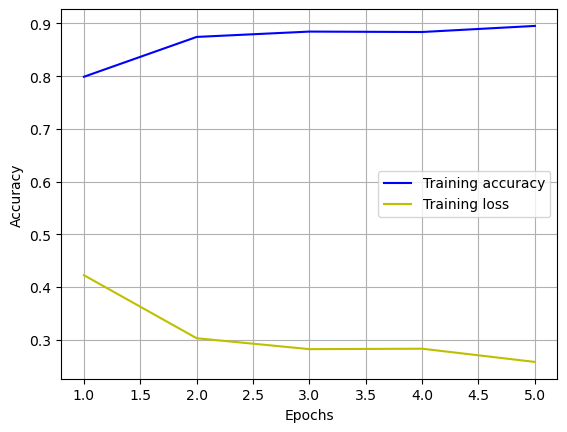

In [36]:
# Let's plot training and validation accuracy as well as loss.
def plot_history(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
plot_history(history)

1594/1594 [==============================] - 67s 42ms/step


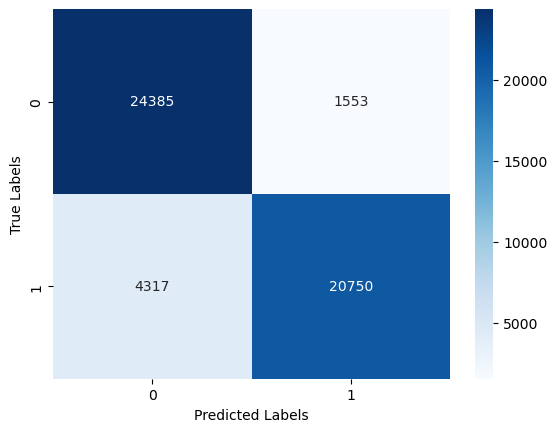

In [39]:
#confusion matrix
y_pred = (model.predict(X_test)[:, 0] > 0.5).astype("int8")
conf_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)
#SNS heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()